In [2]:
import gensim
from sklearn.decomposition import PCA
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import arabic_reshaper
import pandas as pd
from word2vec_results import *

In [3]:
# Continuous bag of words
# Full Gram min count 100
CBOW_model_1 = gensim.models.Word2Vec.load("Twittert-CBOW/fullgram/CBOW_space_300/min_count_100/window_3/continuous_bow_fullgram_vec_size_300-d_min_count_100")

# Full Gram min count 300
CBOW_model_2 = gensim.models.Word2Vec.load("Twittert-CBOW/fullgram/CBOW_space_300/min_count_300/window_3/continuous_bow_fullgram_vec_size_300-d_min_count_300")

# Uni Gram min count 100
CBOW_model_3 = gensim.models.Word2Vec.load("Twittert-CBOW/unigram/CBOW_space_300/min_count_100/window_3/continuous_bow_unigram_vec_size_300-d_min_count_100")

# # Skip-gram
# SKIP_GR_model_4 = gensim.models.Word2Vec.load("Twittert-Skip-Gram/fullgram/Skip_Gram_space_300/min_count_100/window_3/skip_gram_fullgram_vec_size_300-d_min_count_100")
# SKIP_GR_model_5 = gensim.models.Word2Vec.load("Twittert-Skip-Gram/fullgram/Skip_Gram_space_300/min_count_300/window_3/skip_gram_fullgram_vec_size_300-d_min_count_300")
# SKIP_GR_model_6 = gensim.models.Word2Vec.load("Twittert-Skip-Gram/unigram/Skip_Gram_space_300/min_count_100/window_3/skip_gram_unigram_vec_size_300-d_min_count_100")

# # Skip-gram  Negative Sampling
# model_7 = gensim.models.Word2Vec.load("Twittert-Skip-Gram-negative-sampeling/fullgram/Skip_Gram_ns_space_300/min_count_100/window_3/sk_gr_negative_sampeling_fullgram_vec_size_300-d_min_count_100")
# model_8 = gensim.models.Word2Vec.load("Twittert-Skip-Gram-negative-sampeling/fullgram/Skip_Gram_ns_space_300/min_count_300/window_3/sk_gr_negative_sampeling_fullgram_vec_size_300-d_min_count_300")
# model_9 = gensim.models.Word2Vec.load("Twittert-Skip-Gram-negative-sampeling/unigram/Skip_Gram_ns_space_300/min_count_100/window_3/sk_gr_negative_sampeling_unigram_vec_size_300-d_min_count_100")

In [4]:
# Full Gram model min count 100
vocabs = list(CBOW_model_1.wv.index_to_key)
print("The number of words the model learn from your dataset are:", len(vocabs))
print(vocabs[1000:1100])

The number of words the model learn from your dataset are: 2027042
['عقب', 'عملي', 'اول_مره', 'اليوم_.', 'الماك', 'انزل', 'جده', 'بسم', 'الرحمن', 'اÙ', 'في_جده', ':_بسم', 'بسم_الله', 'الله_الرحمن', 'اÙ_.', ':_بسم_الله', 'بسم_الله_الرحمن', 'اÙ_._.', 'حلوه', '^', 'ه', 'حسابشخصي_هه', '^__', '__*', 'وسائل', 'اعلام', 'تستعد', 'وزاره', 'الثقافه', 'طول', 'عمري', 'اسئله', 'الشيخ', 'صلاح', 'يرد', 'علي_فكره', 'اغلاق', 'مدارس', 'باكستان', 'فيهم', 'الله_:', 'انتوا', 'طيبين', ':_كل', 'RT_حسابشخصي_:', 'نسخه', 'تحتاج', 'رحمه', 'بركاته', ':_السلام', 'عليكم_و', 'و_رحمه', 'رحمه_الله', 'الله_و', 'و_بركاته', ':_السلام_عليكم', 'السلام_عليكم_و', 'عليكم_و_رحمه', 'و_رحمه_الله', 'رحمه_الله_و', 'الله_و_بركاته', 'مانشستر', 'يونايتد', 'اهداف_مباراه', 'مانشستر_يونايتد', '3_-', '-_0', 'كروبي', 'كرد', 'tehran', 'كرد_رابطويب', '#_tehran', 'امريكيه', 'تحول', 'التعليم', 'المدرسه', 'البيت', 'دبي', 'مصطفي', 'لقاء', ':_في', 'البيت_و', 'و_من', 'هيفاء', 'وهبي', 'الصور', 'الثلاثاء', '02', 'يونيو', '08', 'هيفاء_وهبي', ':_الثل

In [5]:
# Full Gram model min count 300
vocabs = list(CBOW_model_2.wv.index_to_key)
print("The number of words the model learn from your dataset are:", len(vocabs))
print(vocabs[1000:1100])

The number of words the model learn from your dataset are: 561273
['قضيه', 'ضد', '!_.', '._بس', '!_._.', '._._بس', 'جوجل', ';_.', 'و_كل', 'كل_عام', 'و_انت', ';_._.', 'كل_عام_و', 'ارض', 'ابو', 'عنده', 'فيك', 'p', ':_p', 'بنات', 'اوي', 'انها', 'الشرق', 'الاوسط', 'الشرق_الاوسط', 'News', 'حكم', 'بها', 'ج_.', 'ج_._.', 'وهي', 'الجزيره', 'بعض', 'جريده', 'الاهلي', 'لازم', 'تعمل', 'شهر', 'اكثر', 'اكثر_من', 'امام', 'الصحف', 'حسن', 'النوم', '،_و', 'يدعو', 'التويتر', 'وانا', '24', 'جمال', 'تونس', 'ثلاث', 'غ', 'شاهد', 'اريد', 'الاسلام', '!_؟', 'عندي', 'فـ', '*_*', 'فيديو', 'التي', 'سيدنا', 'سلم', 'عليه_و', 'و_سلم', 'الله_عليه_و', 'عليه_و_سلم', 'دائما', 'الانتخابات', 'هلا', 'ذذ', 'اعضاء', 'صحيح', 'اصبح', 'طيب', 'حسابشخصي_طيب', 'ليله', 'سنوات', 'نحن', 'رمضان', 'ولكن', 'لوول', 'قلبك', 'حل', 'تحت', 'فان', 'سؤال', 'نحو', 'بدون', 'جديد_:', 'بانفلونزا', 'الخنازير', 'برشلونه', 'اعلنت', ':_اعلنت', '._._كل', ')_و', '30', '12']


In [6]:
# Unigram Gram model min count 100
vocabs = list(CBOW_model_3.wv.index_to_key)
print("The number of words the model learn from your dataset are:", len(vocabs))
print(vocabs[1000:1100])

The number of words the model learn from your dataset are: 274006
['الكبري', 'غالبا', 'تركيا', 'امين', 'يلا', 'اختيار', 'اقدم', 'ماده', 'مواد', 'قطع', 'الاسكندريه', '300', 'الرسائل', 'وظائف', 'عدم', 'البحث', 'الوقت', 'الحالي', 'الشركات', 'يناير', 'اجعل', 'مثل', 'اكل', 'فهو', 'ولد', 'فهي', '500', 'افتتاح', 'جائزه', 'لاول', 'اجل', 'احب', 'صارت', 'احسن', 'ابوظبي', 'دقايق', 'وقت', 'بدل', 'الحكم', 'الاخرين', 'جيد', 'وهذا', 'اهل', 'لكي', 'انتظر', 'امري', 'ذا', 'غيره', 'السيده', 'عنها', 'مصدر', 'المؤتمر', 'مهم', 'يستحق', 'ناس', 'فعلا', 'مسؤول', 'رح', 'وقع', 'عقد', 'تعال', 'قل', 'سهلا', 'القهوه', 'مدري', 'كدا', 'دايما', 'الين', 'الظهر', 'دحين', 'اصحي', '-_-', 'يتحدث', 'الرجاء', 'الموت', 'الرد', 'اهم', 'الخدمه', 'ولي', 'عوده', 'ليبيا', 'الحقيقي', 'ازاي', 'حرب', 'اكتوبر', 'مدير', 'مستشفي', 'الجامعه', 'اجراءات', 'تحويل', 'طويل', 'عمرك', 'افكر', 'عمل', 'مهما', 'القلب', 'رجعت', 'اختبار', 'الاربعاء', 'قصيده']


In [7]:
CBOW_model_1.wv.most_similar('طنطا')

[('المنصوره', 0.8620675802230835),
 ('الزقازيق', 0.7875745892524719),
 ('اسكندريه', 0.7411830425262451),
 ('اسيوط', 0.7398534417152405),
 ('المنوفيه', 0.7239159941673279),
 ('المنيا', 0.7057349681854248),
 ('دمنهور', 0.6983345150947571),
 ('القاهره', 0.6881973743438721),
 ('دمياط', 0.6874301433563232),
 ('حلوان', 0.6631385087966919)]

In [8]:
CBOW_model_2.wv.most_similar('طنطا')

[('المنصوره', 0.8240057229995728),
 ('الزقازيق', 0.7503155469894409),
 ('اسكندريه', 0.7129188179969788),
 ('شبين', 0.6993447542190552),
 ('المنوفيه', 0.6986696720123291),
 ('اسيوط', 0.6950699687004089),
 ('دمنهور', 0.6885907649993896),
 ('القاهره', 0.6731441020965576),
 ('المنيا', 0.667472779750824),
 ('دمياط', 0.63706374168396)]

In [9]:
CBOW_model_3.wv.most_similar('طنطا')

[('المنصوره', 0.8733606338500977),
 ('الزقازيق', 0.8210008144378662),
 ('اسكندريه', 0.7576438188552856),
 ('اسيوط', 0.7466562986373901),
 ('دمنهور', 0.7337771654129028),
 ('دمياط', 0.7055661082267761),
 ('المنيا', 0.6958211660385132),
 ('القاهره', 0.6882866024971008),
 ('بنها', 0.6839050054550171),
 ('المنوفيه', 0.6786348819732666)]

In [10]:
CBOW_model_1.wv.most_similar(positive=['ملك', 'امراءه'], negative=['رجل'])

[('ملكه', 0.4930158853530884),
 ('الملكه', 0.3743601143360138),
 ('لملك', 0.36380499601364136),
 ('مستعمره', 0.35215845704078674),
 ('عرش', 0.3518524467945099),
 ('لقبها', 0.3472043573856354),
 ('وعايشه', 0.3448868691921234),
 ('وهي', 0.34364351630210876),
 ('وملكه', 0.34195131063461304),
 ('وملك', 0.3394363224506378)]

In [11]:
CBOW_model_2.wv.most_similar(positive=['ملك', 'امراءه'], negative=['رجل'])

[('ملكه', 0.47308826446533203),
 ('جزيره', 0.3858824670314789),
 ('مملكه', 0.3780002295970917),
 ('لملك', 0.3585319221019745),
 ('ملكها', 0.352352112531662),
 ('الملكه', 0.34122663736343384),
 ('الملوك', 0.3391614854335785),
 ('ملوك', 0.3304111659526825),
 ('تضاهي', 0.3295879065990448),
 ('ممالك', 0.323978066444397)]

In [12]:
CBOW_model_3.wv.most_similar(positive=['ملك', 'امراءه'], negative=['رجل'])

[('ملكه', 0.4585587978363037),
 ('ملوك', 0.41339489817619324),
 ('لملك', 0.4047660827636719),
 ('مملكه', 0.34119361639022827),
 ('الملوك', 0.33499470353126526),
 ('الالهه', 0.3311547636985779),
 ('والملكه', 0.326315701007843),
 ('الملكه', 0.31550106406211853),
 ('وملك', 0.3134204149246216),
 ('ملكها', 0.31077486276626587)]

In [13]:
CBOW_model_1.wv.most_similar('🤣')

[('😆', 0.8333120942115784),
 ('😁', 0.8321138024330139),
 ('😜', 0.8205730319023132),
 ('😏', 0.819418728351593),
 ('😅', 0.8010570406913757),
 ('😒', 0.7967824339866638),
 ('هه', 0.7967004776000977),
 ('😂', 0.7781848907470703),
 ('😬', 0.7624844312667847),
 ('😀', 0.7618412375450134)]

In [14]:
CBOW_model_2.wv.most_similar('🤣')

[('😁', 0.8159818649291992),
 ('😜', 0.8041867613792419),
 ('😆', 0.8018891215324402),
 ('😅', 0.7769911885261536),
 ('هه', 0.76784747838974),
 ('😏', 0.761553168296814),
 ('😂', 0.7601043581962585),
 ('😒', 0.7522543668746948),
 ('😝', 0.7319861650466919),
 ('😀', 0.7271807193756104)]

In [15]:
CBOW_model_3.wv.most_similar('🤣')

[('هه', 0.7712672352790833),
 ('😜', 0.7506940960884094),
 ('😆', 0.7336491942405701),
 ('😁', 0.7191981077194214),
 ('😝', 0.6648421287536621),
 ('😛', 0.6598429679870605),
 ('😬', 0.6583380103111267),
 ('😂', 0.644858181476593),
 ('😏', 0.6313017010688782),
 ('🌚', 0.591846764087677)]

In [16]:
print("The number of emojis: ", len(EMOJIS))
print("The number of sentiment words: ", len(SENTIMENT_WORDS))
print("The number of named entity recognition words", len(NER_WORDS))

The number of emojis:  48
The number of sentiment words:  19
The number of named entity recognition words 60


[t-SNE] Computing 18 nearest neighbors...
[t-SNE] Indexed 19 samples in 0.000s...
[t-SNE] Computed neighbors for 19 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 19 / 19
[t-SNE] Mean sigma: 3.651945
[t-SNE] KL divergence after 100 iterations with early exaggeration: 32.037510
[t-SNE] KL divergence after 150 iterations: 0.513059
The shape of our word_features is: (19, 2)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


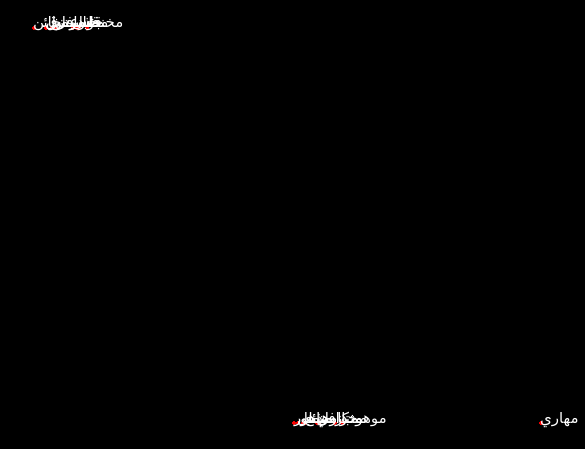

In [17]:
# Reduce the dimension of SENTIMENT_WORDS
tsne_df_scale = tsne_graph(CBOW_model_1, SENTIMENT_WORDS, 500, .03)

_ = init_graph_style()

_ = word_display(tsne_df_scale, SENTIMENT_WORDS, "SENTIMENT_WORDS.png")

[t-SNE] Computing 18 nearest neighbors...
[t-SNE] Indexed 19 samples in 0.000s...
[t-SNE] Computed neighbors for 19 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 19 / 19
[t-SNE] Mean sigma: 3.841468
[t-SNE] KL divergence after 100 iterations with early exaggeration: 29.510666
[t-SNE] KL divergence after 150 iterations: 0.513312
The shape of our word_features is: (19, 2)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


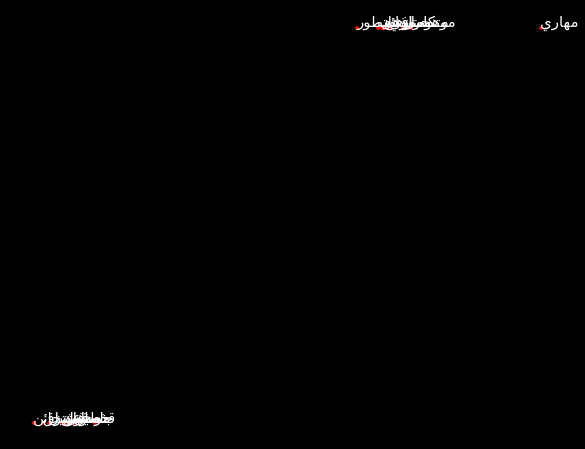

In [18]:
# Reduce the dimension of SENTIMENT_WORDS
tsne_df_scale = tsne_graph(CBOW_model_2, SENTIMENT_WORDS, 500, .03)

_ = init_graph_style()

_ = word_display(tsne_df_scale, SENTIMENT_WORDS, "SENTIMENT_WORDS.png")

[t-SNE] Computing 18 nearest neighbors...
[t-SNE] Indexed 19 samples in 0.000s...
[t-SNE] Computed neighbors for 19 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 19 / 19
[t-SNE] Mean sigma: 4.161916
[t-SNE] KL divergence after 100 iterations with early exaggeration: 32.548813
[t-SNE] KL divergence after 150 iterations: 0.453808
The shape of our word_features is: (19, 2)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


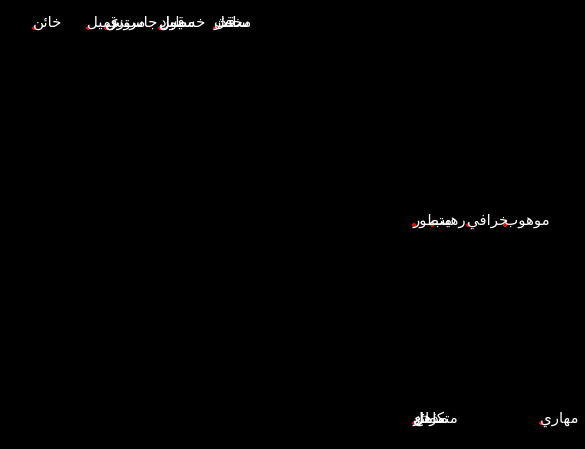

In [19]:
# Reduce the dimension of SENTIMENT_WORDS
tsne_df_scale = tsne_graph(CBOW_model_3, SENTIMENT_WORDS, 500, .03)

_ = init_graph_style()

_ = word_display(tsne_df_scale, SENTIMENT_WORDS, "SENTIMENT_WORDS.png")

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 60 samples in 0.000s...
[t-SNE] Computed neighbors for 60 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 60 / 60
[t-SNE] Mean sigma: 3.076933
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.592644
[t-SNE] KL divergence after 1400 iterations: 0.243809
The shape of our word_features is: (60, 2)


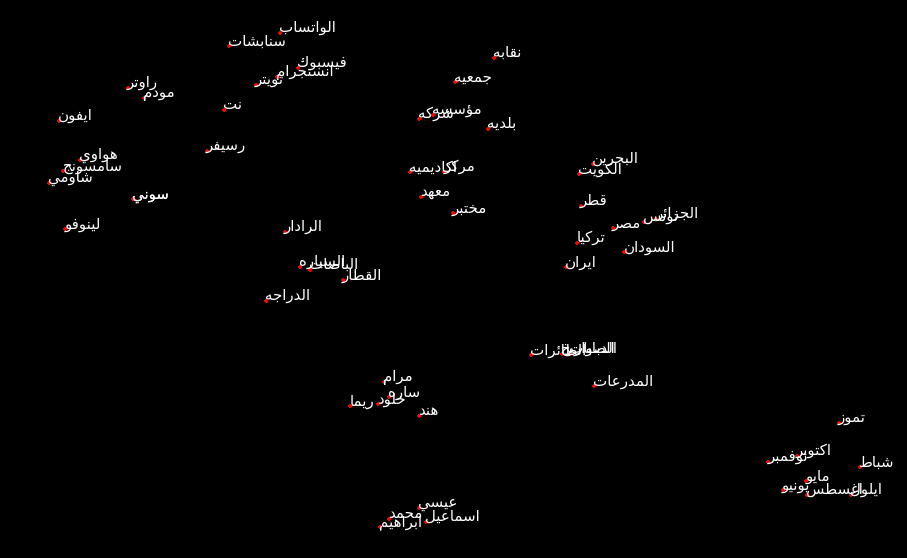

In [20]:
# Reduce the dimension of NER_WORDS
tsne_df_scale = tsne_graph(CBOW_model_1, NER_WORDS, 1400, .03)

_ = init_graph_style(figsize=(16, 10))

_ = word_display(tsne_df_scale, NER_WORDS, "NER_WORDS.png")

In [21]:
# Reduce the dimension of NER_WORDS (error because min count is 300)
tsne_df_scale = tsne_graph(CBOW_model_2, NER_WORDS, 1400, .03)

_ = init_graph_style(figsize=(16, 10))

_ = word_display(tsne_df_scale, NER_WORDS, "NER_WORDS.png")

KeyError: "Key 'لينوفو' not present"

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 60 samples in 0.000s...
[t-SNE] Computed neighbors for 60 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 60 / 60
[t-SNE] Mean sigma: 3.524025
[t-SNE] KL divergence after 200 iterations with early exaggeration: 48.494465
[t-SNE] KL divergence after 1400 iterations: 0.201513
The shape of our word_features is: (60, 2)


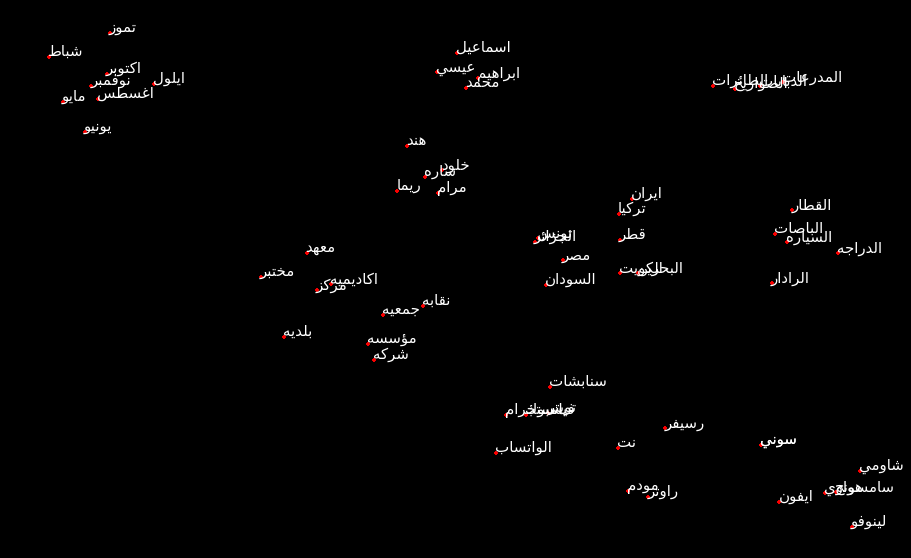

In [22]:
# Reduce the dimension of NER_WORDS
tsne_df_scale = tsne_graph(CBOW_model_3, NER_WORDS, 1400, .03)

_ = init_graph_style(figsize=(16, 10))

_ = word_display(tsne_df_scale, NER_WORDS, "NER_WORDS.png")